<a href="https://colab.research.google.com/github/sejinseo/Python/blob/main/%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* scikit-learn 패키지의 iris 예제 데이터 셋을 로드.
* iris 데이터 탐색
* 데이터 셋을 훈련 셋과, 테스트 셋으로 분리.
* KNN 분류기 생성
* 모델 훈련
* 훈련 셋 평가(정확도), 테스트 셋 평가(정확도)
    * confusion matrix, 분류 리포트 출력
* KNN 모델의 k값을 변화시키면서, 모델 훈련/평가 반복.
    * 테스트 셋에서 가장 좋은 결과를 주는 k값을 찾음.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# KNN 분류기
from sklearn.neighbors import KNeighborsClassifier
# 훈련 셋, 테스트 셋 분리
from sklearn.model_selection import train_test_split
# 모델 평가 지표 함수
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
# 특성 스케일링
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scikit-learn 패키지 데이터 로드
from sklearn.datasets import load_iris

In [12]:
# scikit-learn 패키지의 iris 데이터 셋 로드
iris = load_iris()

In [14]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [29]:
# iris의 sepal length, sepal width, petal length, petal width의 데이터
iris_data = iris.data

In [30]:
# iris의 레이블(정답) 값
iris_label = iris.target

In [25]:
# 보기 쉽게 DataFrame으로 변환
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [72]:
# iris의 레이블을 컬럼에 추가
df_iris['label'] = iris['target']
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


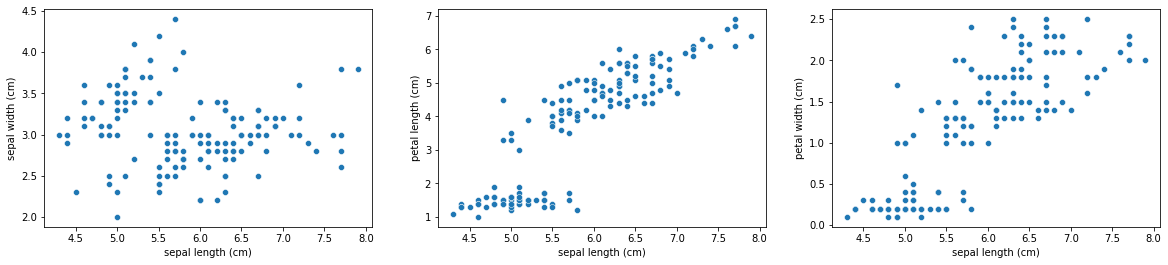

In [51]:
# sepal length와 나머지 특성의 관계
fig, ax = plt.subplots(ncols=3, figsize=(20, 4))

# sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=df_iris, ax=ax[0])
# sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=df_iris, ax=ax[1])
# sns.scatterplot(x='sepal length (cm)', y='petal width (cm)',/ data=df_iris, ax=ax[2])

for x, y in enumerate(df_iris.columns[1:4]):
    sns.scatterplot(x='sepal length (cm)', y=y, data=df_iris, ax=ax[x])

plt.show()

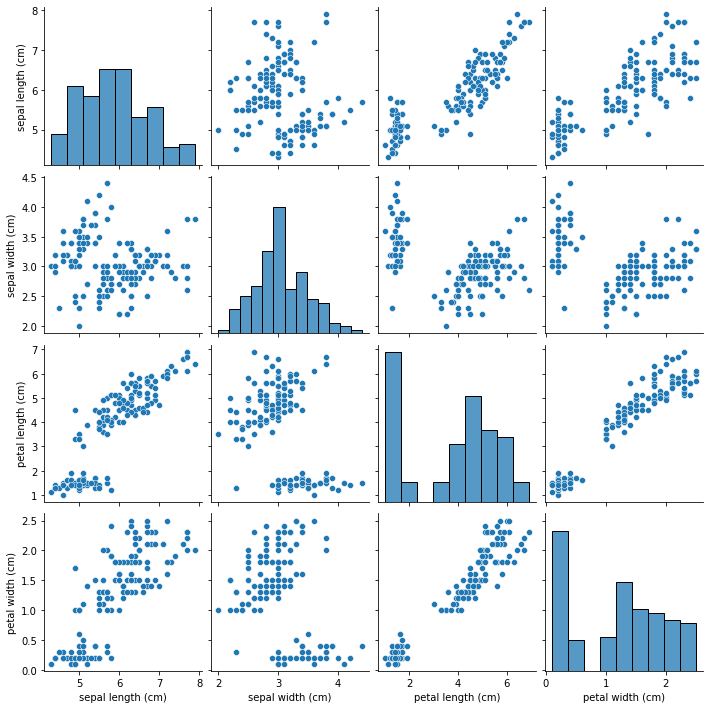

In [56]:
# 변수 2개를 짝을 지어서 그래프를 그려줌.
sns.pairplot(data=df_iris.iloc[:, :4])
plt.show()

In [57]:
# 훈련 셋, 테스트 셋 분리
# 층화 추출을 사용해서 각 클래스의 비율이 비슷하게 유지되도록 샘플링 함
# shuffle의 기본값 True
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                    test_size= 0.3,
                                                    stratify= iris_label,
                                                    random_state=40)

In [59]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [60]:
y_train.shape, y_test.shape

((105,), (45,))

In [61]:
# 7:3 비율로 나누어 졌음
105/150, 45/150

(0.7, 0.3)

In [64]:
# 훈련 셋의 빈도수
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([35, 35, 35]))

In [65]:
# 테스트 셋의 빈도수
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([15, 15, 15]))

# KNN 모델 훈련, 예측, 평가 하기

In [73]:
# 분류기 생성
knn = KNeighborsClassifier()

In [74]:
# 훈련 시키기
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [75]:
# 훈련 셋 예측값
train_pred = knn.predict(X_train)
train_pred

array([0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0,
       2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1,
       0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1,
       1, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 1])

In [76]:
# 훈련 레이블 값
y_train

array([0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0,
       2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1,
       0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1,
       1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1])

In [78]:
# 훈련 셋의 정확도
train_acc = knn.score(X_train, y_train)
train_acc

0.9619047619047619

In [86]:
# 테스트 셋 예측값
test_pred = knn.predict(X_test)
test_pred

array([1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2,
       2])

In [81]:
# 테스트 레이블 값
y_test

array([1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2,
       2])

In [83]:
# 테스트 셋의 정확도
test_acc = knn.score(X_test, y_test)
test_acc

0.9777777777777777

# confusion matrix, 분류 리포트 출력

In [87]:
# confusion matrix 출력
confusion_matrix(y_true=y_test, y_pred=test_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

In [90]:
# 분류 리포트 출력
report = classification_report(y_true=y_test, y_pred=test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



* KNN 모델의 k값을 변화시키면서, 모델 훈련/평가 반복.
    * 테스트 셋에서 가장 좋은 결과를 주는 k값을 찾음.

In [100]:
accuracies = [] # k값을 변화 시키면서 계산한 정확도를 저장할 빈 리스트
for k in range(1, len(df_iris)): # 1부터 데이터의 길이만큼 반복
    knn = KNeighborsClassifier(n_neighbors=k) # 분류기 모델을 생성
    knn.fit(X=iris_data, y=iris_label) # 모델 훈련
    acc = knn.score(iris_data, iris_label) # 정확도 계산
    accuracies.append(acc) # 정확도를 리스트에 추가
print(accuracies)

[1.0, 0.98, 0.96, 0.96, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.98, 0.9733333333333334, 0.98, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667, 0.98, 0.9733333333333334, 0.98, 0.98, 0.98, 0.98, 0.98, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9666666666666667, 0.9733333333333334, 0.9533333333333334, 0.96, 0.9533333333333334, 0.96, 0.96, 0.96, 0.9533333333333334, 0.96, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.9466666666666667, 0.96, 0.94, 0.9533333333333334, 0.9333333333333333, 0.9466666666666667, 0.94, 0.94, 0.9333333333333333, 0.94, 0.94, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9266666666666666, 0.9333333333333333, 0.92, 0.9266666666666666, 0.9133333333333333, 0.9266666666666666, 0.9, 0.9133333333333333, 0.9066666666666666, 0.9066666666666666, 0

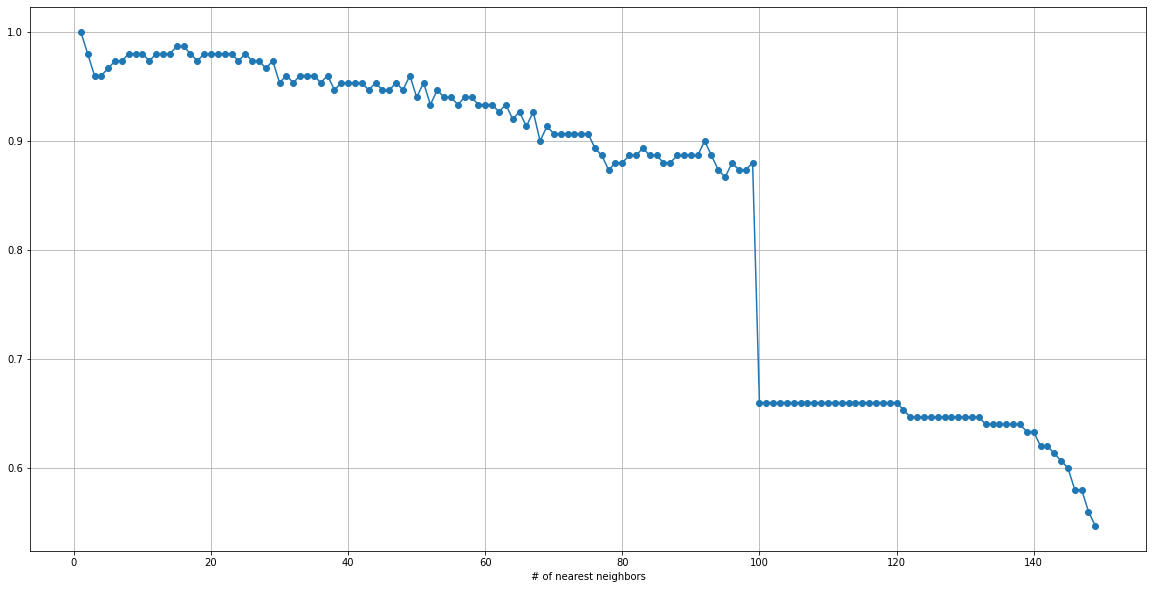

In [105]:
# 정확도 ~ k 그래프 시각화
plt.figure(figsize=(20, 10))
plt.plot(range(1, len(df_iris)), accuracies, 'o-')

plt.xlabel('# of nearest neighbors')
plt.grid()
plt.show()